## Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [2]:
df = pd.read_csv('../data/fraud_data.csv')
print('shape: ',df.shape)
df.info()
df.head()

shape:  (1296675, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Checks

In [3]:
# duplicates
print('duplicates:', df.duplicated().sum())
# missing
print('missing:', df.isnull().sum())
# datatypes
print(df.dtypes)

duplicates: 0
missing: Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city         

In [4]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

### Data Cleaning

In [5]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"], format='%Y-%m-%d %H:%M:%S')

In [6]:
# Remove 'Unnamed: 0' index column
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

# EDA

In [8]:
# Target
fraud_stats = df['is_fraud'].value_counts()
fraud_pct = df['is_fraud'].value_counts(normalize=True) * 100

In [9]:
# Fraud Distribution:")
print(f"Non-Fraud: {fraud_stats[0]:,} ({fraud_pct[0]:.2f}%)")
print(f"Fraud: {fraud_stats[1]:,} ({fraud_pct[1]:.2f}%)")
print(f"Imbalance Ratio: 1:{fraud_stats[0]/fraud_stats[1]:.2f}")

Non-Fraud: 1,289,169 (99.42%)
Fraud: 7,506 (0.58%)
Imbalance Ratio: 1:171.75


is_fraud
0    1289169
1       7506
Name: count, dtype: int64
fraud rate 0.005788651743883394


<Axes: xlabel='is_fraud', ylabel='count'>

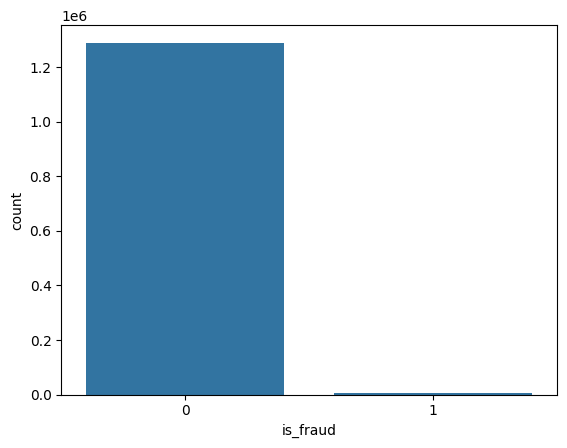

In [10]:
print(df['is_fraud'].value_counts())
print('fraud rate', df['is_fraud'].mean())
sns.countplot(x='is_fraud', data=df)

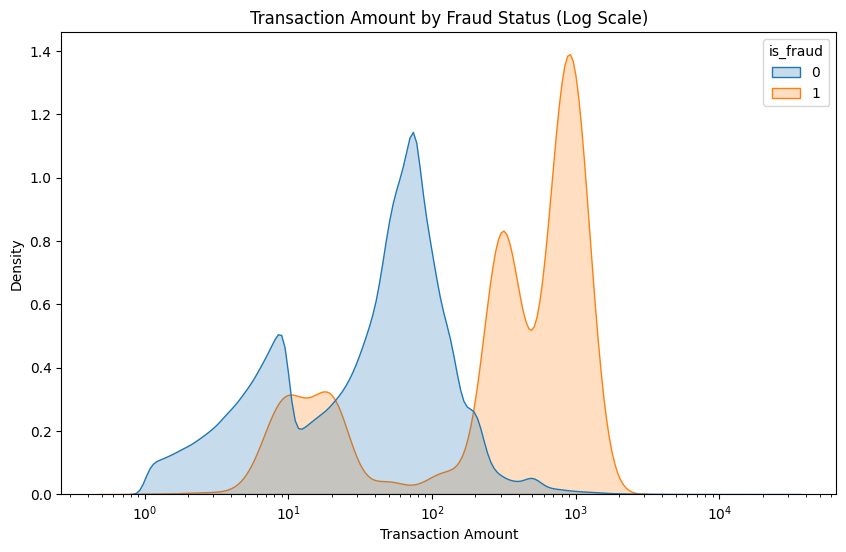

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='amt', hue='is_fraud', log_scale=True, common_norm=False, fill=True)
plt.title('Transaction Amount by Fraud Status (Log Scale)')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

## Amount Statistics

In [12]:
df.groupby('is_fraud')['amt'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,67.667110,154.007971,1.00,9.6100,47.280,82.540,28948.90
1,7506.0,531.320092,390.560070,1.06,245.6625,396.505,900.875,1376.04


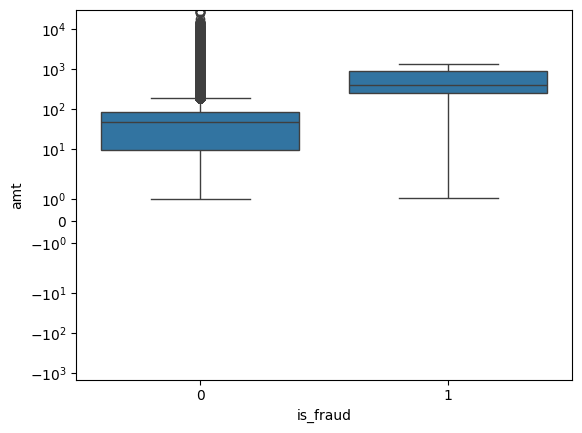

In [13]:
# boxplot amt by fraud
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.yscale('symlog')

(0.0, 545.9926000000002)

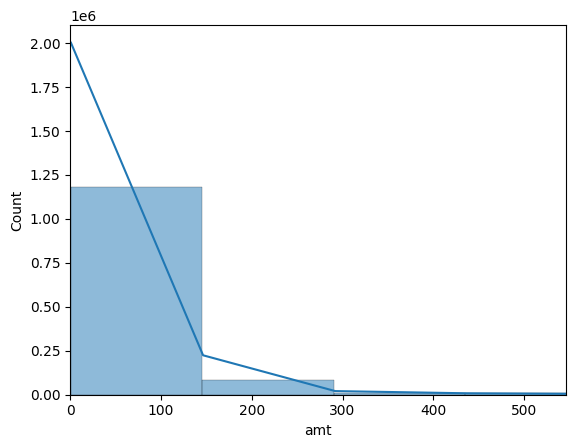

In [14]:
# amt distribution
sns.histplot(df['amt'], bins=200, kde=True)
plt.xlim(0, df['amt'].quantile(0.99))


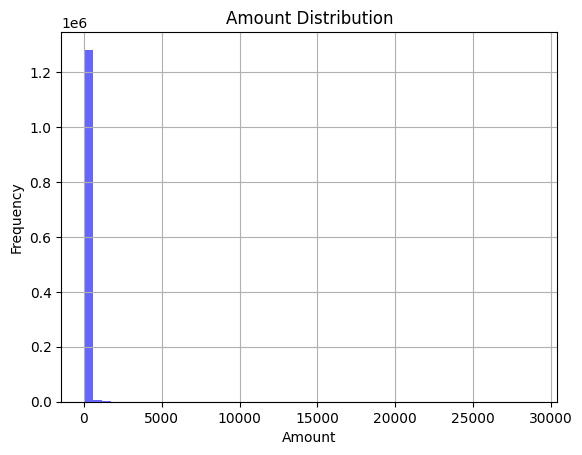

In [15]:
# Histogram
df[df['is_fraud']==0]['amt'].hist(bins=50, alpha=0.6, label='Non-Fraud', color='blue')
df[df['is_fraud']==1]['amt'].hist(bins=50, alpha=0.6, label='Fraud', color='red')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

### Category analysis

In [16]:
category_fraud = df.groupby('category')['is_fraud'].agg(['sum', 'count', 'mean'])
category_fraud.columns = ['fraud_count', 'total_transactions', 'fraud_rate']
category_fraud = category_fraud.sort_values('fraud_rate', ascending=False)
print(category_fraud)

                fraud_count  total_transactions  fraud_rate
category                                                   
shopping_net           1713               97543    0.017561
misc_net                915               63287    0.014458
grocery_pos            1743              123638    0.014098
shopping_pos            843              116672    0.007225
gas_transport           618              131659    0.004694
misc_pos                250               79655    0.003139
grocery_net             134               45452    0.002948
travel                  116               40507    0.002864
entertainment           233               94014    0.002478
personal_care           220               90758    0.002424
kids_pets               239              113035    0.002114
food_dining             151               91461    0.001651
home                    198              123115    0.001608
health_fitness          133               85879    0.001549


<Axes: ylabel='category'>

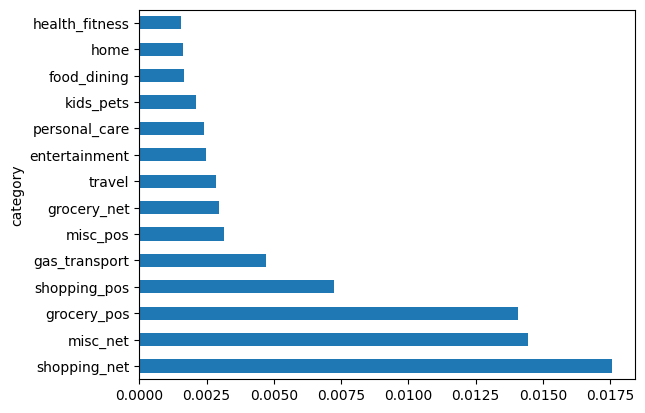

In [17]:
# Fraud rate
category_fraud['fraud_rate'].plot(kind='barh')

<Axes: ylabel='category'>

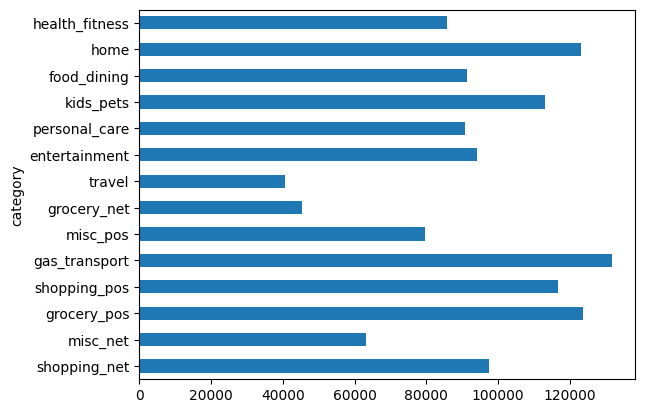

In [18]:
# Transaction volume
category_fraud['total_transactions'].plot(kind='barh')

### Analysis: temporal features 'trans_date_trans_time'

In [19]:
# extract time features
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['day_of_month'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

<Axes: title={'center': 'Fraud rate by hour'}, xlabel='hour'>

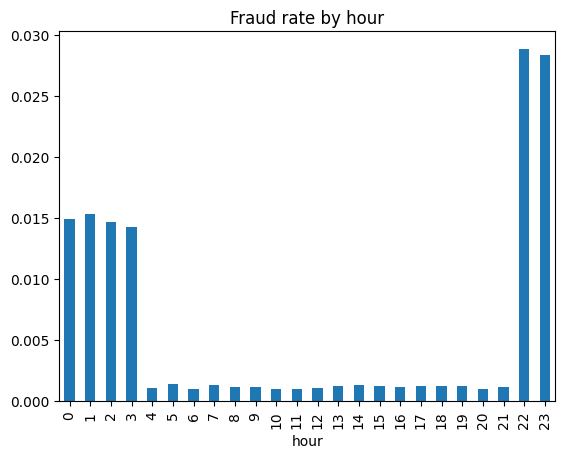

In [20]:
# fraud by hour
fraud_hour = df.groupby('hour')['is_fraud'].mean()
fraud_hour.plot(kind='bar', title='Fraud rate by hour')

<function matplotlib.pyplot.show(close=None, block=None)>

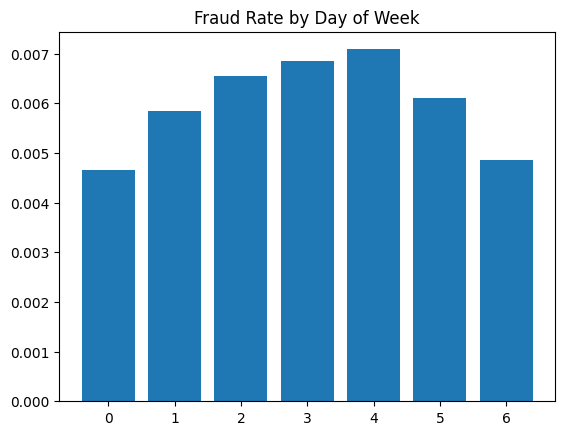

In [21]:
# Fraud day week
dow_fraud = df.groupby('day_of_week')['is_fraud'].mean()
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(range(7), dow_fraud.values)
plt.title('Fraud Rate by Day of Week')
plt.show

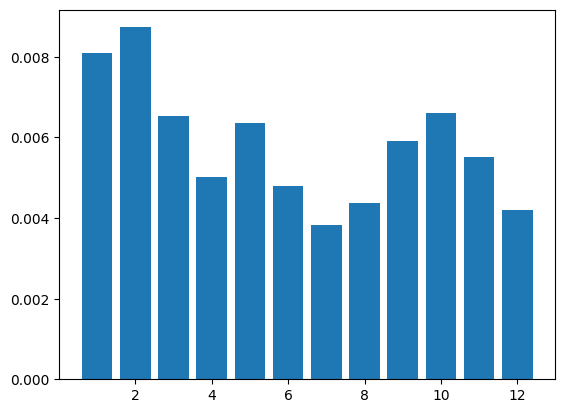

In [22]:
# Monthly trend
monthly_fraud = df.groupby('month')['is_fraud'].mean()
plt.bar(monthly_fraud.index, monthly_fraud.values)
plt.show()

### Customer Analysis

In [23]:
# Calculate age from DOB
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days / 365.25

In [24]:
# Gender analysis
gender_fraud = df.groupby('gender')['is_fraud'].mean()
print(gender_fraud)

gender
F    0.005262
M    0.006426
Name: is_fraud, dtype: float64


In [25]:
# Age
print(df.groupby('is_fraud')['age'].describe())

              count       mean        std        min        25%        50%  \
is_fraud                                                                     
0         1289169.0  45.980114  17.383760  13.921971  32.596851  43.956194   
1            7506.0  48.793489  18.868606  14.360027  32.977413  47.802875   

                75%        max  
is_fraud                        
0         57.045859  95.638604  
1         60.952772  93.774127  


<function matplotlib.pyplot.show(close=None, block=None)>

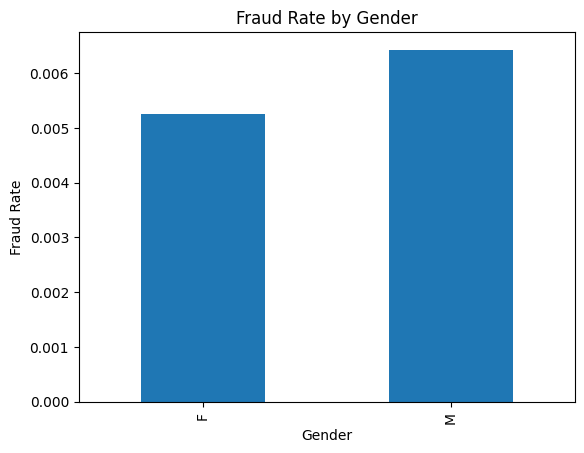

In [26]:
# Gender
gender_fraud.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Gender')
plt.show

<Axes: xlabel='total_txn', ylabel='Count'>

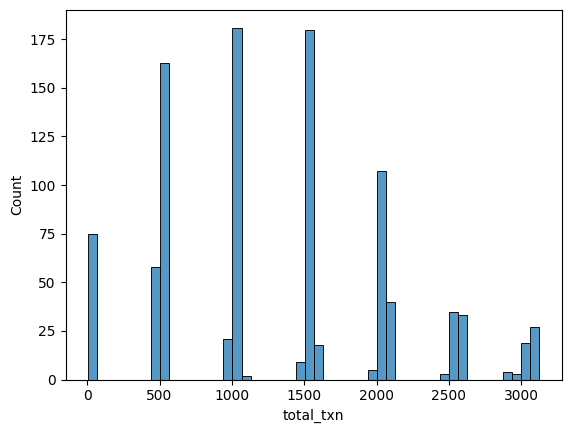

In [27]:
card_stats = df.groupby('cc_num').agg(
total_txn=('trans_num','count'),
fraud_txn=('is_fraud','sum'),
avg_amt=('amt','mean'),
std_amt=('amt','std')
).reset_index()

# distribution
sns.histplot(card_stats['total_txn'], bins=50)

### Merchant

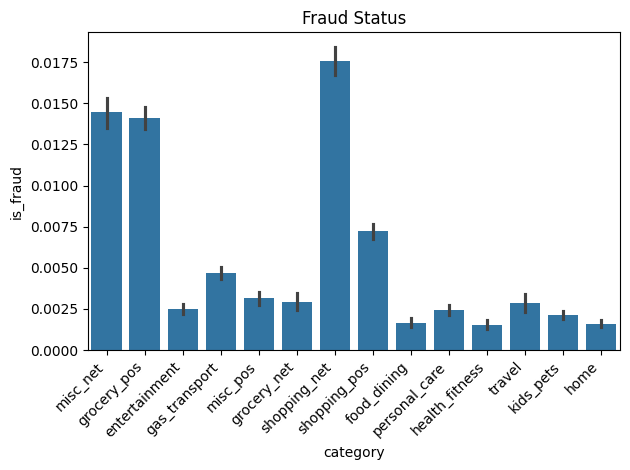

In [28]:
sns.barplot(x='category', y='is_fraud', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Fraud Status')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 30 merchants by txn count')

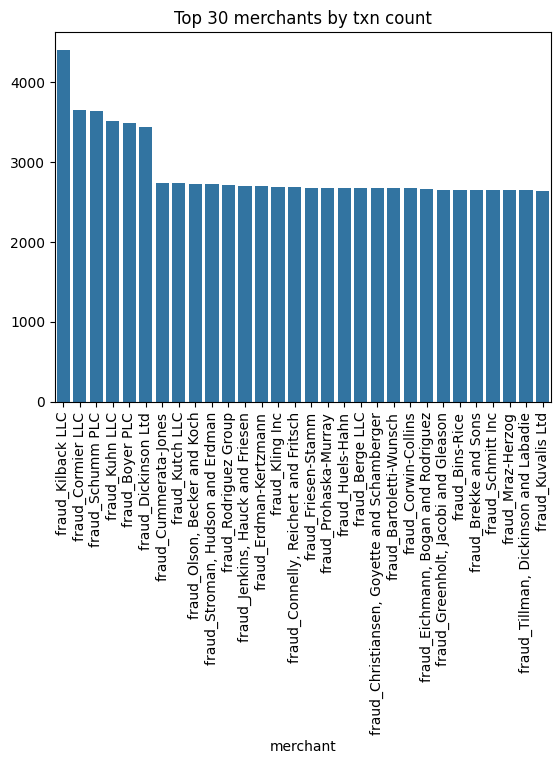

In [29]:
# top merchants
top_merchants = df['merchant'].value_counts().head(30)
plt.xticks(rotation=90)
ax = sns.barplot(x=top_merchants.index, y=top_merchants.values)
ax.set_title('Top 30 merchants by txn count')


In [30]:
# merchant fraud rate
m = df.groupby('merchant')['is_fraud'].agg(['count','sum'])
m['fraud_rate'] = m['sum'] / m['count']
m = m.sort_values('fraud_rate', ascending=False)
m.head(20)

,count,sum,fraud_rate
merchant,,,
fraud_Kozey-Boehm,1866,48,0.025723
"fraud_Herman, Treutel and Dickens",1300,33,0.025385
fraud_Kerluke-Abshire,1838,41,0.022307
fraud_Brown PLC,1176,26,0.022109
fraud_Goyette Inc,1943,42,0.021616
fraud_Terry-Huel,1996,43,0.021543
fraud_Jast Ltd,1953,42,0.021505
"fraud_Schmeler, Bashirian and Price",1968,41,0.020833
fraud_Boyer-Reichert,1908,38,0.019916


### Geographic analysis

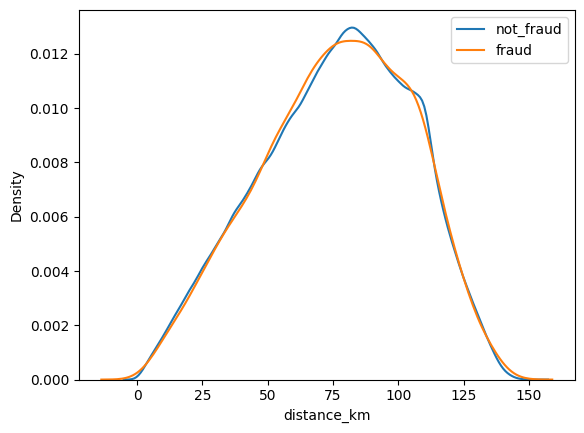

In [31]:
# distance calc helper (haversine)
from math import radians, cos, sin, asin, sqrt


def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6367 * c
    return km

# small = df.sample(200000, random_state=42)
df['distance_km'] = df.apply(lambda r: haversine(r['long'], r['lat'], r['merch_long'], r['merch_lat']), axis=1)


sns.kdeplot(df[df['is_fraud']==0]['distance_km'], label='not_fraud')
sns.kdeplot(df[df['is_fraud']==1]['distance_km'], label='fraud')
plt.legend()

In [32]:
cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
# cat_cols
for c in cat_cols:
    print('\n', c)
    print(df.groupby(c)['is_fraud'].mean().sort_values(ascending=False).head(10))


 trans_date_trans_time
trans_date_trans_time
2019-08-14 19:37:52    1.0
2019-05-19 16:06:04    1.0
2019-01-20 23:49:41    1.0
2019-02-19 23:22:07    1.0
2020-06-17 03:25:33    1.0
2019-02-07 17:17:57    1.0
2019-06-23 16:41:06    1.0
2019-02-26 22:48:37    1.0
2019-03-23 00:17:48    1.0
2019-01-20 23:53:21    1.0
Name: is_fraud, dtype: float64

 merchant
merchant
fraud_Kozey-Boehm                       0.025723
fraud_Herman, Treutel and Dickens       0.025385
fraud_Kerluke-Abshire                   0.022307
fraud_Brown PLC                         0.022109
fraud_Goyette Inc                       0.021616
fraud_Terry-Huel                        0.021543
fraud_Jast Ltd                          0.021505
fraud_Schmeler, Bashirian and Price     0.020833
fraud_Boyer-Reichert                    0.019916
fraud_Langworth, Boehm and Gulgowski    0.019807
Name: is_fraud, dtype: float64

 category
category
shopping_net     0.017561
misc_net         0.014458
grocery_pos      0.014098
shopping_pos  

In [33]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'hour', 'day_of_week', 'day_of_month',
       'month', 'is_weekend', 'age', 'distance_km'],
      dtype='object')

In [34]:
features = ['amt', 'merchant', 'category', 'gender', 'city_pop', 'age', 
            'lat', 'long','merch_lat','merch_long', 'distance_km', 
            'trans_date_trans_time', 'unix_time', 'hour', 'day_of_week', 'day_of_month', 
            'month', 'is_weekend', 'is_fraud']


In [35]:
final_df = df[features]

In [36]:
final_df.columns

Index(['amt', 'merchant', 'category', 'gender', 'city_pop', 'age', 'lat',
       'long', 'merch_lat', 'merch_long', 'distance_km',
       'trans_date_trans_time', 'unix_time', 'hour', 'day_of_week',
       'day_of_month', 'month', 'is_weekend', 'is_fraud'],
      dtype='object')

In [37]:
final_df.head()

,amt,merchant,category,gender,city_pop,age,lat,long,merch_lat,merch_long,distance_km,trans_date_trans_time,unix_time,hour,day_of_week,day_of_month,month,is_weekend,is_fraud
0,4.97,"fraud_Rippin, Kub and Mann",misc_net,F,3495,30.814511,36.0788,-81.1781,36.011293,-82.048315,78.548221,2019-01-01 00:00:18,1325376018,0,1,1,1,0,0
1,107.23,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,149,40.531143,48.8878,-118.2105,49.159047,-118.186462,30.193207,2019-01-01 00:00:44,1325376044,0,1,1,1,0,0
2,220.11,fraud_Lind-Buckridge,entertainment,M,4154,56.950034,42.1808,-112.2620,43.150704,-112.154481,108.138146,2019-01-01 00:00:51,1325376051,0,1,1,1,0,0
3,45.00,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,1939,51.969884,46.2306,-112.1138,47.034331,-112.561071,95.613163,2019-01-01 00:01:16,1325376076,0,1,1,1,0,0
4,41.96,fraud_Keeling-Crist,misc_pos,M,99,32.763860,38.4207,-79.4629,38.674999,-78.632459,77.508050,2019-01-01 00:03:06,1325376186,0,1,1,1,0,0


In [38]:
# Feature Engineering
# temporal
final_df['hour_sin'] = np.sin(2 * np.pi * final_df['hour'] / 24)
final_df['hour_cos'] = np.cos(2 * np.pi * final_df['hour'] / 24)
final_df['day_sin'] = np.sin(2 * np.pi * final_df['day_of_week'] / 7)
final_df['day_cos'] = np.cos(2 * np.pi * final_df['day_of_week'] / 7)
final_df['month_sin'] = np.sin(2 * np.pi * final_df['month'] / 12)
final_df['month_cos'] = np.cos(2 * np.pi * final_df['month'] / 12)

C:\Users\sudwa\AppData\Local\Temp\ipykernel_596\1713046637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['hour_sin'] = np.sin(2 * np.pi * final_df['hour'] / 24)
C:\Users\sudwa\AppData\Local\Temp\ipykernel_596\1713046637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['hour_cos'] = np.cos(2 * np.pi * final_df['hour'] / 24)
C:\Users\sudwa\AppData\Local\Temp\ipykernel_596\1713046637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [39]:
# Amount-based features
final_df['log_amt'] = np.log1p(final_df['amt'])
final_df['amt_squared'] = df['amt'] ** 2
final_df['amt_sqrt'] = np.sqrt(final_df['amt'])

C:\Users\sudwa\AppData\Local\Temp\ipykernel_596\4095277384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['log_amt'] = np.log1p(final_df['amt'])
C:\Users\sudwa\AppData\Local\Temp\ipykernel_596\4095277384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['amt_squared'] = df['amt'] ** 2
C:\Users\sudwa\AppData\Local\Temp\ipykernel_596\4095277384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [40]:
# Distance features
final_df['log_distance'] = np.log1p(final_df['distance_km'])
final_df['is_long_distance'] = (final_df['distance_km'] > 100).astype(int)
final_df['distance_squared'] = final_df['distance_km'] ** 2

In [41]:
# Location velocity (change in location)
final_df['location_change'] = np.sqrt(
    (final_df['lat'] - final_df['merch_lat'])**2 + 
    (final_df['long'] - final_df['merch_long'])**2
)

In [42]:
final_df.columns

Index(['amt', 'merchant', 'category', 'gender', 'city_pop', 'age', 'lat',
       'long', 'merch_lat', 'merch_long', 'distance_km',
       'trans_date_trans_time', 'unix_time', 'hour', 'day_of_week',
       'day_of_month', 'month', 'is_weekend', 'is_fraud', 'hour_sin',
       'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'log_amt',
       'amt_squared', 'amt_sqrt', 'log_distance', 'is_long_distance',
       'distance_squared', 'location_change'],
      dtype='object')

In [43]:
final_df.to_csv('../data/fraud_data_processed.csv', index=False)

In [44]:

# df_final = df.drop(columns=features, errors='ignore')
# df_final.columns